## Identificando e contando objetos

* Objetivo: Fazer o computador calcular a pontuação dos dados.

É necessário identificar:
1. Onde estão os dados na imagem;
2. Quantos dados foram jogados;
3. Qual é o lado que esta para cima.

Passos:
1. Converter a imagem para escala de cinza;
2. Aplicar blur para retirar o ruído e facilitar a identificação das bordas;
3. Aplicar binarização para obter apenas pixels pretos e brancos;
4. Aplicar um detector de bordas;
5. Contar os contornos externos pra achar a quantidade de dados presentes na imagem.

In [1]:
import cv2
import mahotas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# funcao para facilitar a escrita na imagem
def escreve(img, texto, cor=(255,0,0)):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, texto, (10, 20), fonte, 0.5, cor, 0, cv2.LINE_AA)

In [8]:
imgColor = cv2.imread('../img/dados.png')
# conversao para escala de cinza
img = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
# blur
suave = cv2.blur(img, (9,9))
# binarizacao
T = mahotas.thresholding.otsu(suave)
bin = suave.copy()
bin[bin > T] = 255
bin[bin < 255] = 0
bin = cv2.bitwise_not(bin)
# canny
bordas = cv2.Canny(bin, 70, 150)
# identificacao e contagem dos contornos da imagem
    # cv2.RETR_EXTERNAL: conta os contornos externos
    # lx recebe dados que nao serao utilizados
(objetos, lx) = cv2.findContours(bordas.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

escreve(img, 'imagem em tons de cinza', 0)
escreve(suave, 'suavizacao com blur', 0)
escreve(bordas, 'detector de bordas canny', 255)
escreve(bin, 'binarizacao com otsu', 255)

temp = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin, bordas])
])

cv2.imshow('quantidade de objetos '+str(len(objetos)), temp)
cv2.waitKey(0)

-1

quantidade de objetos 1


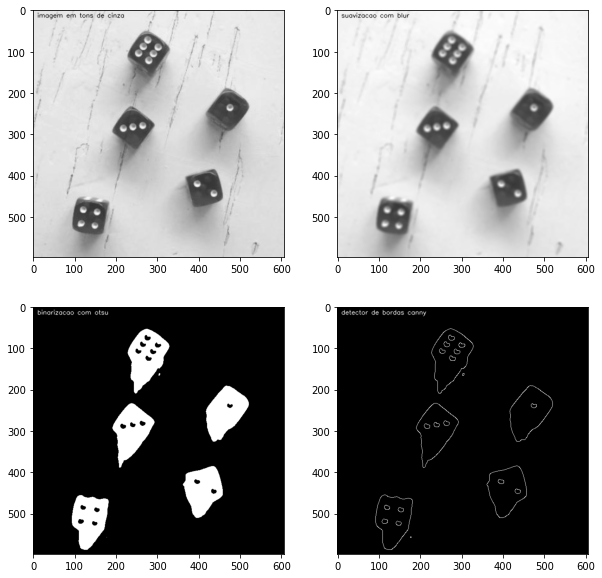

In [4]:
plt.figure(figsize=(10,10))
print('quantidade de objetos ' + str(len(objetos)))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.subplot(222), plt.imshow(suave, cmap='gray')
plt.subplot(223), plt.imshow(bin, cmap='gray')
plt.subplot(224), plt.imshow(bordas, cmap='gray')
plt.show()

In [9]:
imgC2 = imgColor.copy()
cv2.imshow('imagem original', imgColor)
cv2.waitKey(0)
cv2.drawContours(imgC2, objetos, -1, (255,0,0), 2)
escreve(imgC2, str(len(objetos))+' objetos encontrados!')
cv2.imshow('resultado', imgC2)
cv2.waitKey(0)

-1

In [10]:
def cvtrgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

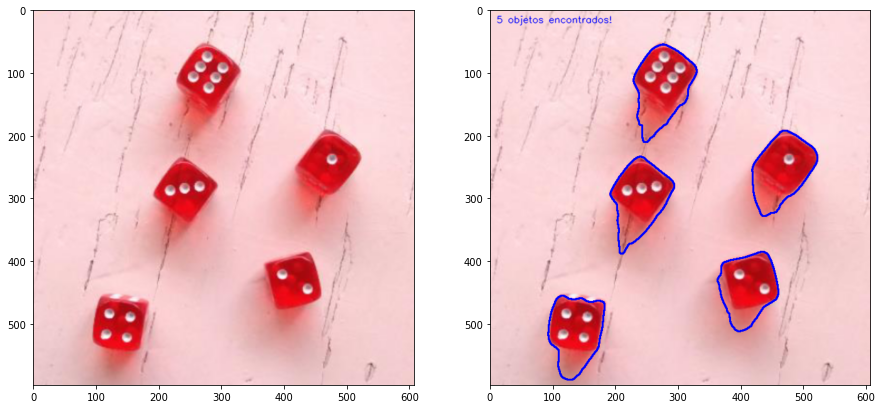

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cvtrgb(imgColor))
plt.subplot(122), plt.imshow(cvtrgb(imgC2))

plt.show()